In [1]:
%matplotlib notebook
import csv
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = loadmat('ex3data1.mat')
y = data['y']
x = data['X']
unos = np.full((5000,1),1)
th =np.zeros((401,1))
num_etiquetas = [1,2,3,4,5,6,7,8,9,10]
x = np.append(unos, x, axis=1)

<IPython.core.display.Javascript object>


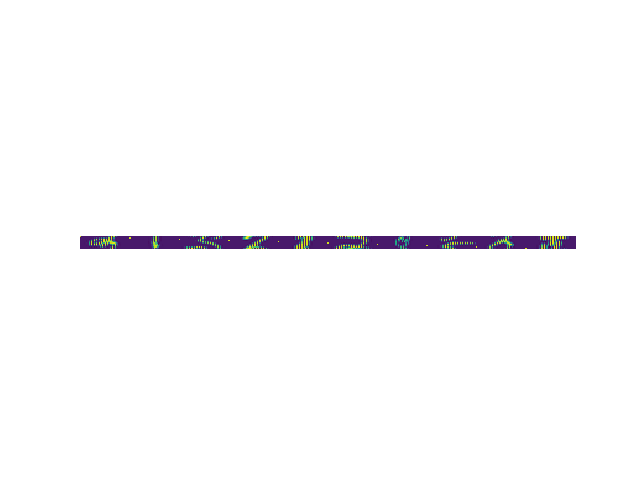

(-0.5, 400.5, 9.5, -0.5)

In [4]:
sample = np.random.choice(x.shape[0], 10)
plt.imshow(x[sample, :].reshape(-1,10).T)
plt.axis('off')

In [5]:
def sigmoide(z):
    s = np.dot(z,-1)
    e = np.exp(s)
    d = 1 + e
    return 1/d

In [6]:
def coste(th, x, y, lamda=1):
    g = sigmoide(np.dot(x,th))
    log1 = np.log(g)
    log2 = np.log(1-g)
    tr1 = np.dot(np.transpose(log1),y)
    tr2 = np.dot(np.transpose(log2),(1-y))
    c = -(tr1+tr2)/len(y)
    s = np.sum(th**2)/(2*len(y))
    return c + lamda*s
coste(th,x,y)

array([[160.39425758]])

In [7]:
def gradiente(th,x,y,lamda=1):
    return np.dot(np.transpose(x),sigmoide(np.dot(x,th))-y)/len(y) + (lamda/len(y))*th
f =gradiente(th,x,y)

In [10]:
def lrgradientReg(theta,X,y, reg):
    m = y.size
    h = sigmoide(X.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [11]:
f.shape

(401, 1)

In [59]:
def oneVsAll(X, y, num_etiquetas, reg=0.1):
    matriz = []
    calificacion = np.zeros((10,5000))
    th = np.zeros((401,1))
    for i in range(num_etiquetas):
        c = np.isin(y,i+1)
        result = opt.fmin_tnc(func=coste, x0=th, fprime=lrgradientReg, args=(X, c*1,reg))
        th_opt = result[0]
        matriz.append(th_opt)
    j = np.dot(matriz,np.transpose(X))
    for u in range(len(X)):
        calificacion[np.argmax(j[:,u])][u] = 1
    return np.transpose(calificacion)
f =oneVsAll(x,y, 10)
f

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
len(y)

5000

In [69]:
def testeo(y, f):
    acertados = 0
    for i in range(len(y)):
        if np.argmax(f[i])+1 == y[i]:
            acertados +=1
    return acertados, acertados/len(y)*100

In [70]:
aciertos, porcentaje = testeo(y,f)

In [71]:
porcentaje

96.46000000000001

In [19]:
weights = loadmat('ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [20]:
def fprop(x, th):
    activacion = []
    for i in range(x.shape[1]):
        k = 0
        a= [1]
        for j in range(th.shape[0]):
            k += np.sum(np.dot(x[i],th[j][i]))
            a.append(sigmoide(k))
        activacion.append(a)
    return np.array(activacion)
f = fprop(x,theta1)
f2 = fprop(f,theta2)

In [21]:
 np.sum(np.dot(x[1],theta1[0][1]))

-7.594877165634998e-07

In [22]:
f2

array([[1.00000000e+00, 2.25818832e-01, 9.68800731e-02, 3.39465635e-02,
        1.15820787e-02, 4.44014289e-03, 1.07535591e-03, 4.58084091e-04,
        1.36279878e-04, 4.63237242e-05, 2.19658902e-05],
       [1.00000000e+00, 7.78885343e-08, 3.16615945e-04, 1.24440092e-15,
        6.44865684e-13, 6.61860326e-25, 2.33187586e-22, 3.12594274e-15,
        1.81569044e-19, 2.52174362e-16, 9.16756499e-25],
       [1.00000000e+00, 2.01770818e-01, 9.61821156e-09, 9.99837406e-01,
        9.99999939e-01, 1.00000000e+00, 1.00000000e+00, 9.99990365e-01,
        3.42296522e-14, 1.49384833e-06, 1.07805807e-13],
       [1.00000000e+00, 1.28303588e-14, 1.00499970e-03, 4.83719952e-22,
        5.20865980e-23, 1.44480505e-11, 1.73167933e-10, 2.09231728e-22,
        2.92409871e-20, 2.52907976e-26, 3.73868445e-22],
       [1.00000000e+00, 7.05006704e-07, 3.20790253e-12, 1.35729896e-13,
        2.30327109e-02, 2.00107598e-01, 1.99132608e-03, 2.74611193e-12,
        3.89852510e-11, 1.40747909e-34, 6.00000094e-